In [ ]:
#import libraries
import glob
import os 
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import clear_output, display
import time
import seaborn as sns
import requests
import zipfile
import io
import csv
import itertools

%matplotlib inline

#Declare the variables and assign values

#relative GDELT data file path
GDELT_data_path = r'.\GDELT Data'

#this holds the GDELT CSV file name that is exported and imported
GDELT_file_name = "GDELT_Tesla"

#market file name
mkt_data_file_name = "^NYA.csv"

#GDELT data filters
actor1_country_code = "US"
actor2_country_code = "US"
src_url_contains = "Tesla"

In [34]:
#THIS ONLY NEEDS TO BE RUN IF DOWNLOADING ADDITIONAL GDELT DATA - DATA USED IN ANALYSIS IS PROVIDED
#open list of dates to download
with open('date_list.csv') as f:
  reader = csv.reader(f)
  x = list(reader)
from_index=list(itertools.chain(*x))
temp_date = pd.to_datetime(from_index)
date_list = temp_date.strftime('%Y%m%d')

#date_list = stock_return_over3per.index.strftime('%Y%m%d')
for i in date_list: 
    url = "http://data.gdeltproject.org/events/{}.export.CSV.zip".format(i)
    clear_output(wait=True) 
    print("Download and unzip ", url)
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(GDELT_data_path)

Download and unzip  http://data.gdeltproject.org/events/20170101.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170102.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170103.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170104.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170105.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170106.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170107.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170108.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170109.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170110.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170111.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170112.export.CSV.zip
Download and unzip  http://data.gdeltpro

Download and unzip  http://data.gdeltproject.org/events/20170414.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170415.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170416.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170417.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170418.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170419.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170420.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170421.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170422.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170423.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170424.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170425.export.CSV.zip
Download and unzip  http://data.gdeltpro

Download and unzip  http://data.gdeltproject.org/events/20170726.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170727.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170728.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170729.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170730.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170731.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170801.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170802.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170803.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170804.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170805.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20170806.export.CSV.zip
Download and unzip  http://data.gdeltpro

Download and unzip  http://data.gdeltproject.org/events/20171106.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20171107.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20171108.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20171109.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20171110.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20171111.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20171112.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20171113.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20171114.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20171115.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20171116.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20171117.export.CSV.zip
Download and unzip  http://data.gdeltpro

Download and unzip  http://data.gdeltproject.org/events/20180217.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180218.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180219.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180220.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180221.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180222.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180223.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180224.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180225.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180226.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180227.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180228.export.CSV.zip
Download and unzip  http://data.gdeltpro

Download and unzip  http://data.gdeltproject.org/events/20180531.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180601.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180602.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180603.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180604.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180605.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180606.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180607.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180608.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180609.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180610.export.CSV.zip
Download and unzip  http://data.gdeltproject.org/events/20180611.export.CSV.zip
Download and unzip  http://data.gdeltpro

OSError: [Errno 28] No space left on device

In [27]:
#THIS ONLY NEEDS TO BE RUN IF CREATING A NEW FILTERED GDELT CSV - DATA USED IN ANALYSIS IS PROVIDED
#load the file names from the directory 
filenames = sorted(glob.glob(os.path.join(GDELT_data_path, "*.csv")))
#create an empty data frame to load the data into
gdelt_concatenated_df = pd.DataFrame(columns=["GLOBALEVENTID",
                      "Date", 
                      "Actor1Code",
                      "Actor1Name", 
                      "Actor1CountryCode", 
                      "Actor1Type1Code",
                      "Actor2Code",
                      "Actor2Name", 
                      "Actor2CountryCode", 
                      "Actor2Type1Code",
                      "EventCode", 
                      "AvgTone",
                      "Actor1Geo_FullName",
                      "Actor1Geo_CountryCode",
                      "Actor2Geo_FullName",
                      "Actor2Geo_CountryCode",
                      "SOURCEURL"])

counter = 0
#loop through all GDELT csv daily files and filter
for f in filenames:
    with open(f) as file:
        df_from_each_file = (pd.read_csv(f, sep='\t',encoding = "ISO-8859-1", header=None, low_memory=False))
        
        df = df_from_each_file.iloc[:, np.r_[0,1,5,6,7,12,15,16,17,22,26,34,36,37,43,44,57]]
        df.columns = ["GLOBALEVENTID",
                      "Date", 
                      "Actor1Code",
                      "Actor1Name", 
                      "Actor1CountryCode", 
                      "Actor1Type1Code",
                      "Actor2Code",
                      "Actor2Name", 
                      "Actor2CountryCode", 
                      "Actor2Type1Code",
                      "EventCode", 
                      "AvgTone",
                      "Actor1Geo_FullName",
                      "Actor1Geo_CountryCode",
                      "Actor2Geo_FullName",
                      "Actor2Geo_CountryCode",
                      "SOURCEURL"]
        
        #filter to adjust country code of events
        gdelt_df = df[(df['Actor1Geo_CountryCode']==actor1_country_code) | (df['Actor2Geo_CountryCode']==actor2_country_code)]
        
        #filter the URL mentions
        gdelt_df = gdelt_df[gdelt_df['SOURCEURL'].str.contains(src_url_contains)]
        
        #add the filtered data to the data frame
        gdelt_concatenated_df = pd.concat([gdelt_concatenated_df, gdelt_df], ignore_index=True)
        
        #incremement the counter to track progress
        counter += 1
        
        #print the counter so we know this is still working
        clear_output(wait=True)
        display(counter)  # use display(f) if you encounter performance issues

#output the data frame to a single CSV file
gdelt_concatenated_df.to_csv('.\{}.csv'.format(GDELT_file_name),sep=',')
#let the user know we finished
print('file filter and export completed')

365

file filter and export completed


In [ ]:
#load the GDELT data
df = (pd.read_csv('{}.csv'.format(GDELT_file_name), sep=',', low_memory=False))
#sort by date, group by date, then get the average tone per date
Events_df = df.groupby('Date', as_index=False)['AvgTone'].mean().sort_values('Date')

#load the market data
market_data = pd.read_csv('.\Market Data\{}'.format(mkt_data_file_name), sep=',')
#convert the date format
Events_df['Date'] = pd.to_datetime(Events_df['Date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")

#convert columns to date types
Events_df['Date']  = pd.to_datetime(Events_df['Date'])
market_data['Date'] = pd.to_datetime(market_data['Date'])
#set the date column as the index for the market data
market_data = market_data.set_index('Date')
#get just the adjusted close columns into new dataframes
market_data_cls = market_data[['Adj Close']]

#sort the index and get only the business month end values dropping any NaN rows
market_data_cls=market_data_cls.sort_index().dropna()

#use shift to calculate daily returns over the period
market_dly_rtn = ((market_data_cls/market_data_cls.shift(1))).dropna()

#merge the daily return data
rtn_tone = Events_df.merge(market_dly_rtn, on='Date')
#merge the closing price daily data
cls_rtn_tone = rtn_tone.merge(market_data_cls, on='Date')
#assign the column names
cls_rtn_tone.columns = ['Date','AvgTone','AdjRtn', 'AdjCls']

#output the result of news tone correlation with return on stock and closing price
print('Correlation of news tone and adjusted closing price: {}'.format(cls_rtn_tone['AvgTone'].corr(cls_rtn_tone['AdjCls'])))

#Correlation Tesla =0.22641409730722228
#Correlation of NYSE =-0.0062
#Correlation Alibaba =0.19572092994905563
#Correlation of Exxon = -0.14344943666076354

In [16]:
#Date range from July 2017 to June 2018
df_Tesla=pd.read_csv("GDELT_Tesla_lag.csv",parse_dates=["Date"],index_col="Date",usecols=["Date","AvgTone"])
df_Tesla.head()

,AvgTone
Date,
2017-07-03,1.060071
2017-07-03,1.060071
2017-07-03,1.060071
2017-07-03,4.166667
2017-07-04,3.480278


In [6]:
df_TeslaStockPrice=pd.read_csv(".\Market Data\TSLA_lag.csv",parse_dates=["Date"],index_col="Date",usecols=["Date","Adj Close"])
df_TeslaStockPrice.head()

,Adj Close
Date,
2017-07-03,352.619995
2017-07-05,327.089996
2017-07-06,308.829987
2017-07-07,313.220001
2017-07-10,316.049988


In [7]:
#Deal with Missing dates when stock market was closed
#Pick date range from July 3rd 2017 to June 30th 2018
All_Dates=pd.DataFrame(data=None,index=pd.date_range(start='7/3/2017',end='6/30/2018',freq='D'))
All_DatesTeslaStock=df_TeslaStockPrice.reindex(All_Dates.index)
#Take previous day stock price if stock market closes
All_DatesTeslaStock=All_DatesTeslaStock.fillna(method='ffill')
All_DatesTeslaStock.head()

,Adj Close
2017-07-03,352.619995
2017-07-04,352.619995
2017-07-05,327.089996
2017-07-06,308.829987
2017-07-07,313.220001


In [8]:
#Sometimes Multiple events happened on the same day, so I decide to take the average tone as that day AvgTone
df_Tesla2=df_Tesla.groupby('Date', as_index=True).agg({"AvgTone":"mean"})
df_Tesla2.head()

,AvgTone
Date,
2017-04-14,1.705757
2017-05-05,-3.707136
2017-07-03,1.836720
2017-07-04,3.480278
2017-07-05,-2.032712


In [9]:
#There are dates out of my analysis period(July2017-June2018), so I remove other dates
df_TeslaUnique=df_Tesla2.loc['2017-07-01':'2018-07-01']
df_TeslaUnique.head()
#So we got unique index time series of our Tesla media sentiment data

,AvgTone
Date,
2017-07-03,1.836720
2017-07-04,3.480278
2017-07-05,-2.032712
2017-07-07,0.486512
2017-07-08,1.156707


In [10]:
#Merge two dataframes
df=pd.merge(df_TeslaUnique,All_DatesTeslaStock,left_index=True, right_index=True)
df.head()

,AvgTone,Adj Close
2017-07-03,1.836720,352.619995
2017-07-04,3.480278,352.619995
2017-07-05,-2.032712,327.089996
2017-07-07,0.486512,313.220001
2017-07-08,1.156707,313.220001


In [11]:
#I want know how stock prices react in 7 days after a event happend and what correlation it is 
#So here I define a function that compare Day1 stock price with previous 7 days media sentiment. 
#Shift my dataframe before calling corr()
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [12]:
LaggedTimeSeries=df_derived_by_shift(df,lag=7,NON_DER=["AdjClose"])
LaggedTimeSeries.head(10)

,AvgTone,Adj Close,AvgTone_1,AvgTone_2,AvgTone_3,AvgTone_4,AvgTone_5,AvgTone_6,AvgTone_7,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7
2017-07-03,1.836720,352.619995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04,3.480278,352.619995,1.836720,NaN,NaN,NaN,NaN,NaN,NaN,352.619995,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05,-2.032712,327.089996,3.480278,1.836720,NaN,NaN,NaN,NaN,NaN,352.619995,352.619995,NaN,NaN,NaN,NaN,NaN
2017-07-07,0.486512,313.220001,-2.032712,3.480278,1.836720,NaN,NaN,NaN,NaN,327.089996,352.619995,352.619995,NaN,NaN,NaN,NaN
2017-07-08,1.156707,313.220001,0.486512,-2.032712,3.480278,1.836720,NaN,NaN,NaN,313.220001,327.089996,352.619995,352.619995,NaN,NaN,NaN
2017-07-09,4.856130,313.220001,1.156707,0.486512,-2.032712,3.480278,1.836720,NaN,NaN,313.220001,313.220001,327.089996,352.619995,352.619995,NaN,NaN
2017-07-10,0.613946,316.049988,4.856130,1.156707,0.486512,-2.032712,3.480278,1.836720,NaN,313.220001,313.220001,313.220001,327.089996,352.619995,352.619995,NaN
2017-07-11,3.550319,327.220001,0.613946,4.856130,1.156707,0.486512,-2.032712,3.480278,1.836720,316.049988,313.220001,313.220001,313.220001,327.089996,352.619995,352.619995
2017-07-13,2.507837,323.410004,3.550319,0.613946,4.856130,1.156707,0.486512,-2.032712,3.480278,327.220001,316.049988,313.220001,313.220001,313.220001,327.089996,352.619995
2017-07-16,-1.178928,327.779999,2.507837,3.550319,0.613946,4.856130,1.156707,0.486512,-2.032712,323.410004,327.220001,316.049988,313.220001,313.220001,313.220001,327.089996


In [13]:
LaggedTimeSeries=LaggedTimeSeries.dropna()
LaggedTimeSeries.head()

,AvgTone,Adj Close,AvgTone_1,AvgTone_2,AvgTone_3,AvgTone_4,AvgTone_5,AvgTone_6,AvgTone_7,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7
2017-07-11,3.550319,327.220001,0.613946,4.856130,1.156707,0.486512,-2.032712,3.480278,1.836720,316.049988,313.220001,313.220001,313.220001,327.089996,352.619995,352.619995
2017-07-13,2.507837,323.410004,3.550319,0.613946,4.856130,1.156707,0.486512,-2.032712,3.480278,327.220001,316.049988,313.220001,313.220001,313.220001,327.089996,352.619995
2017-07-16,-1.178928,327.779999,2.507837,3.550319,0.613946,4.856130,1.156707,0.486512,-2.032712,323.410004,327.220001,316.049988,313.220001,313.220001,313.220001,327.089996
2017-07-17,-1.776111,319.570007,-1.178928,2.507837,3.550319,0.613946,4.856130,1.156707,0.486512,327.779999,323.410004,327.220001,316.049988,313.220001,313.220001,313.220001
2017-07-19,0.088889,325.260010,-1.776111,-1.178928,2.507837,3.550319,0.613946,4.856130,1.156707,319.570007,327.779999,323.410004,327.220001,316.049988,313.220001,313.220001


In [14]:
#Finally we can calculate correlation
LaggedTimeSeries.corr()

,AvgTone,Adj Close,AvgTone_1,AvgTone_2,AvgTone_3,AvgTone_4,AvgTone_5,AvgTone_6,AvgTone_7,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7
AvgTone,1.000000,0.184094,0.164548,0.188012,0.205907,0.078173,0.156975,0.139819,0.055127,0.183078,0.179749,0.218660,0.207465,0.247582,0.245692,0.250789
Adj Close,0.184094,1.000000,0.191802,0.209113,0.193836,0.162912,0.167972,0.144216,0.157215,0.940275,0.885711,0.837585,0.778444,0.734361,0.686803,0.642224
AvgTone_1,0.164548,0.191802,1.000000,0.168716,0.193538,0.216121,0.079447,0.161828,0.142930,0.180706,0.178522,0.177145,0.214454,0.203499,0.246920,0.243645
AvgTone_2,0.188012,0.209113,0.168716,1.000000,0.177031,0.201070,0.208456,0.098428,0.171718,0.185294,0.172972,0.171299,0.169611,0.212787,0.212728,0.256004
AvgTone_3,0.205907,0.193836,0.193538,0.177031,1.000000,0.173675,0.196381,0.213531,0.102435,0.211062,0.188031,0.173001,0.173687,0.177025,0.221871,0.225671
AvgTone_4,0.078173,0.162912,0.216121,0.201070,0.173675,1.000000,0.167242,0.199916,0.217182,0.201546,0.221328,0.192145,0.182150,0.190147,0.191879,0.244672
AvgTone_5,0.156975,0.167972,0.079447,0.208456,0.196381,0.167242,1.000000,0.161271,0.196739,0.166578,0.206727,0.223871,0.196918,0.188319,0.191545,0.196823
AvgTone_6,0.139819,0.144216,0.161828,0.098428,0.213531,0.199916,0.161271,1.000000,0.168919,0.165035,0.163110,0.202246,0.220052,0.199044,0.197730,0.202467
AvgTone_7,0.055127,0.157215,0.142930,0.171718,0.102435,0.217182,0.196739,0.168919,1.000000,0.142641,0.163087,0.160763,0.200247,0.221793,0.204788,0.204651
Adj Close_1,0.183078,0.940275,0.180706,0.185294,0.211062,0.201546,0.166578,0.165035,0.142641,1.000000,0.940225,0.885826,0.837149,0.777889,0.729382,0.682732


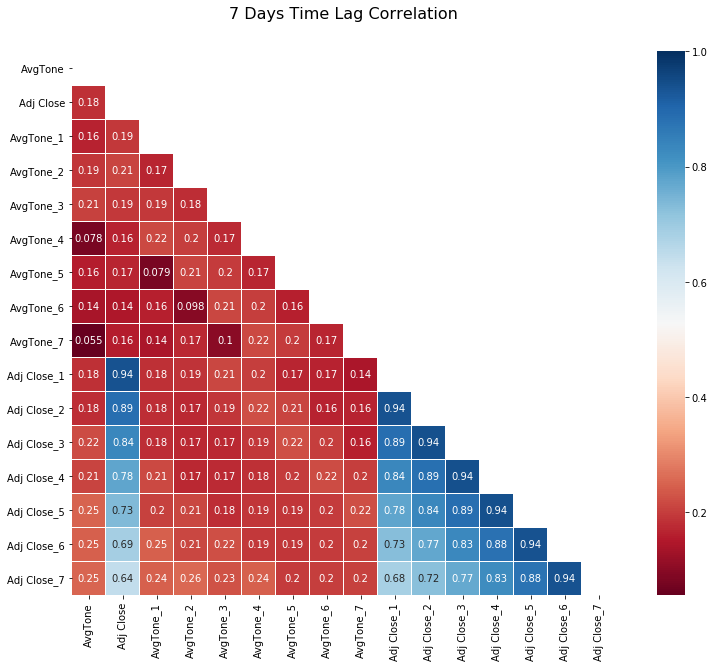

In [15]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'7 Days Time Lag Correlation', y=1.05, size=16)

mask = np.zeros_like(LaggedTimeSeries.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(LaggedTimeSeries.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
#Conclusion
#From the above chart, on the same day, correlation between stock price and media sentiment is 18.4%. 
#When we compare stock price with previous 7 days events media sentiment, the first two highest correlation is 2-day-ago and 3-day-ago, 20.91% and 19.38%.
#Even though overall correlation is not very high, there are so many other factors which could lead to Tesla stock prices change in reality, such as major economic announcements, company’s earnings per share (EPS), inflation, etc. As in our analysis, we only take Tesla related events news and I am relatively confident to say that Tesla stock price react the most to 2-day-ago Tesla related events.